In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
metrics = {"accuracy": 0.8, "f1_score": 0.75}
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor


In [2]:
train=pd.read_csv("new medicine.csv")

In [3]:
train.head(20)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient            92 non-null     object
 1   Medicine           92 non-null     object
 2   Disease            92 non-null     object
 3   Variety            92 non-null     object
 4   Quantity(Packets)  92 non-null     int64 
 5   Date               92 non-null     object
 6   Season             92 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [4]:
train.shape


train.describe()


train.isnull().sum()

Patient              0
Medicine             0
Disease              0
Variety              0
Quantity(Packets)    0
Date                 0
Season               0
dtype: int64

In [5]:
train.head()

,Patient,Medicine,Disease,Variety,Quantity(Packets),Date,Season
0,John Doe,Artemisinin,Malaria,Vivax,10,4/15/2021,Wet
1,Jane Smith,Paracetamol,Fever,Influenza,5,2/20/2021,Dry
2,Michael Johnson,Aspirin,Pain,Migraine,8,3/10/2021,Wet
3,Emily Brown,Artemisinin,Malaria,Falciparum,15,4/5/2021,Wet
4,David Williams,Ibuprofen,Pain,Headache,7,5/12/2021,Wet


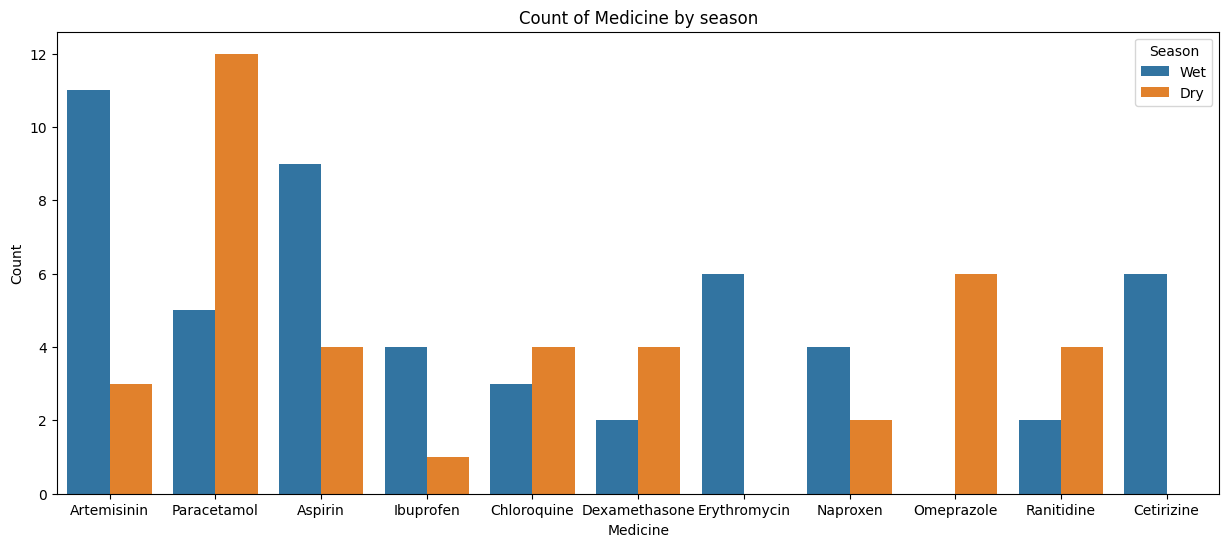

In [6]:
plt.figure(figsize=(15, 6))
sns.countplot(x='Medicine', hue='Season', data=train)
plt.title('Count of Medicine by season')
plt.xlabel('Medicine')
plt.ylabel('Count')
plt.show()

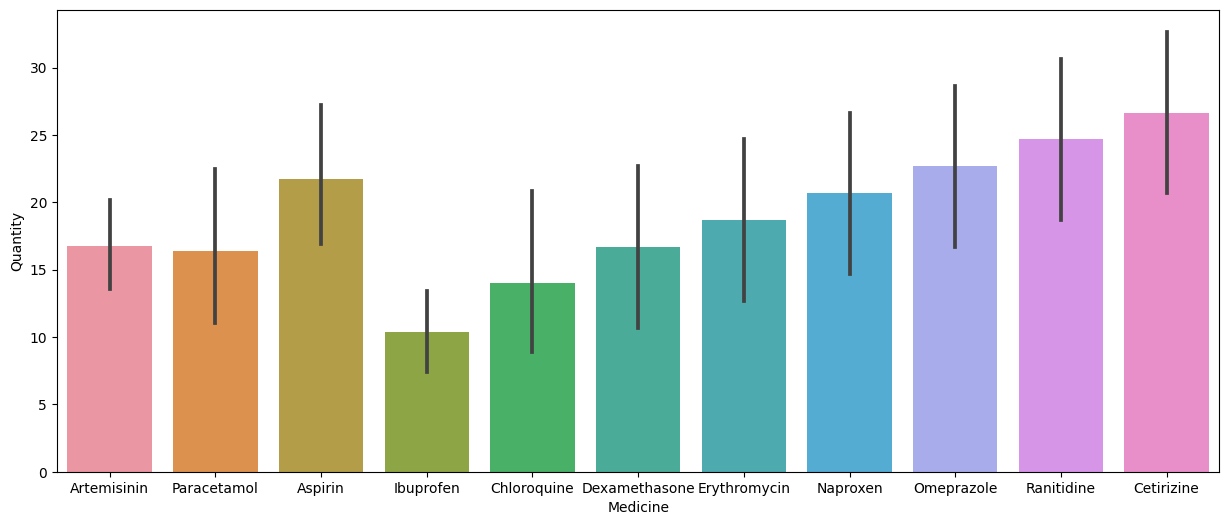

In [7]:
plt.figure(figsize=(15, 6))
sns.barplot(x='Medicine', y='Quantity(Packets)', data=train)

plt.xlabel('Medicine')
plt.ylabel('Quantity')
plt.show()

array([[<Axes: title={'center': 'Quantity(Packets)'}>]], dtype=object)

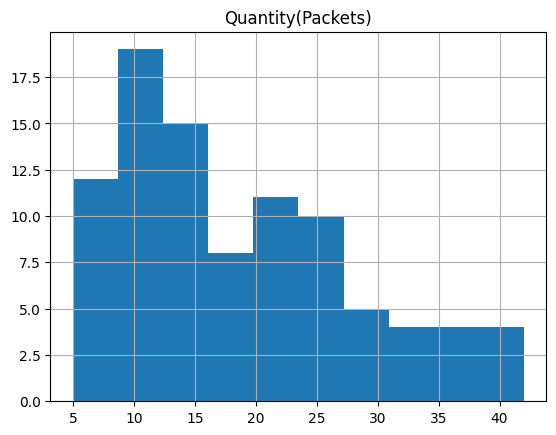

In [8]:
train.hist()

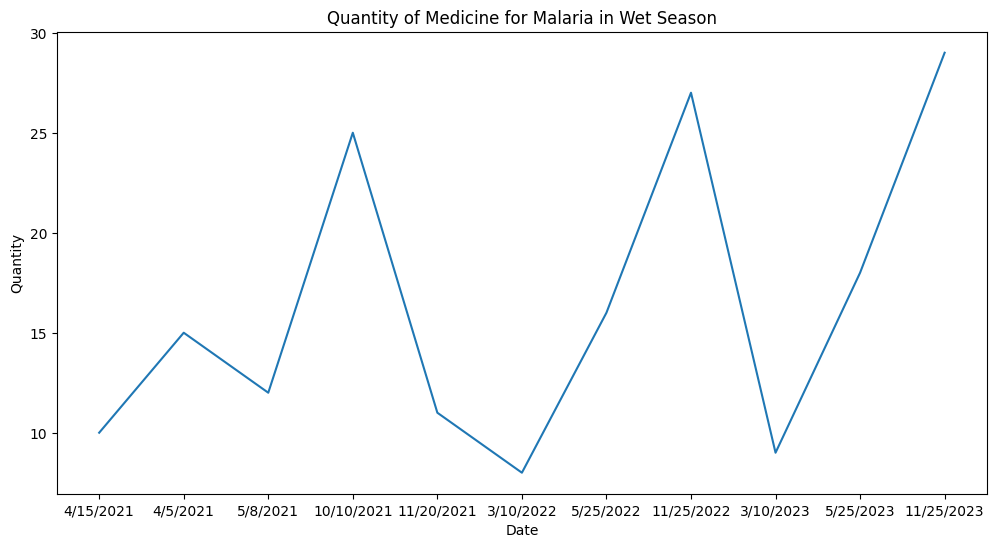

In [9]:
#choose the disease you want
Ds1 = "Artemisinin"

# Filter data for chosen disease and season
disease_data = train[(train["Medicine"] == Ds1) & (train["Season"] == "Wet")]


plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Quantity(Packets)', data=disease_data)

plt.title('Quantity of Medicine for Malaria in Wet Season')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.show()

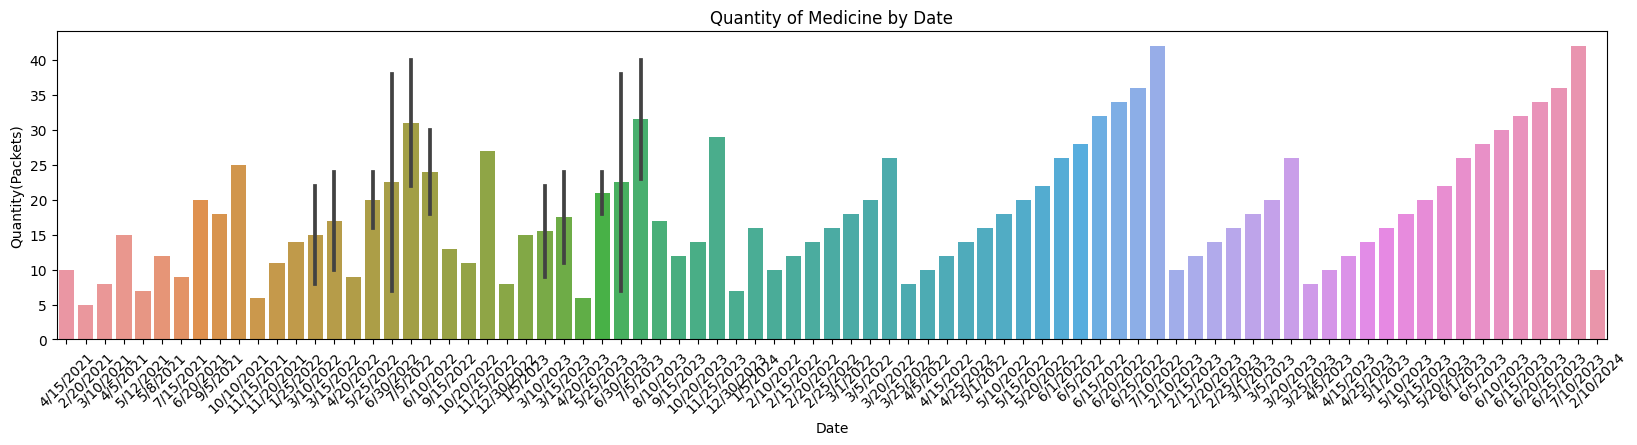

In [10]:
# Plot a bar chart of Quantity by Disease
plt.figure(figsize=(20, 4))
sns.barplot(x='Date', y='Quantity(Packets)', data=train)

plt.xlabel('Date')
plt.ylabel('Quantity(Packets)')
plt.title('Quantity of Medicine by Date')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.show()

In [11]:
# Import necessary libraries
import pandas_profiling

# Generate pandas profiling report for the selected_data dataframe
profile = train.profile_report()

# Print the pandas profiling report
print(profile)

# Generate data for the selected_data dataframe
data = train.sample(5)

# Print the generated data
print(data)

profile.to_notebook_iframe()  # View interactive report


              Patient      Medicine    Disease      Variety  \
71          Patient I       Aspirin       Pain     Migraine   
19  Charlotte Johnson   Artemisinin    Malaria        Vivax   
39          Patient C  Erythromycin  Pneumonia     Migraine   
32       Logan Taylor   Paracetamol      Fever  Common Cold   
10        Ava Jackson   Paracetamol      Fever    Influenza   

    Quantity(Packets)        Date Season  
71                 24   3/15/2023    Wet  
19                 18   6/10/2022    Dry  
39                 14   2/20/2022    Wet  
32                 12   9/15/2023    Wet  
10                  6  11/15/2021    Wet  


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
train_data=train

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Patient            92 non-null     object
 1   Medicine           92 non-null     object
 2   Disease            92 non-null     object
 3   Variety            92 non-null     object
 4   Quantity(Packets)  92 non-null     int64 
 5   Date               92 non-null     object
 6   Season             92 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.2+ KB


In [14]:
train_data["Date"]=pd.to_datetime(train_data["Date"])

train_data['Date']=train_data['Date'].dt.to_period("M")

monthly_sales=train_data.groupby("Date").sum().reset_index()

monthly_sales=monthly_sales['Date'].dt.to_timestamp()

train.head(50)

,Patient,Medicine,Disease,Variety,Quantity(Packets),Date,Season
0,John Doe,Artemisinin,Malaria,Vivax,10,2021-04,Wet
1,Jane Smith,Paracetamol,Fever,Influenza,5,2021-02,Dry
2,Michael Johnson,Aspirin,Pain,Migraine,8,2021-03,Wet
3,Emily Brown,Artemisinin,Malaria,Falciparum,15,2021-04,Wet
4,David Williams,Ibuprofen,Pain,Headache,7,2021-05,Wet
5,Sarah Wilson,Artemisinin,Malaria,Vivax,12,2021-05,Wet
6,James Anderson,Paracetamol,Fever,Common Cold,9,2021-07,Dry
7,Emma Taylor,Artemisinin,Malaria,Falciparum,20,2021-06,Dry
8,Olivia Miller,Aspirin,Pain,Back Pain,18,2021-09,Wet
9,Ethan Martinez,Artemisinin,Malaria,Vivax,25,2021-10,Wet


In [15]:
# Sample Period object
period = pd.Period("2023-11")

# Correct approaches:
year = period.year  # Extract year as an integer
timestamp = period.to_timestamp().timestamp()
period_str = str(period)  # Convert to string

In [16]:
# Print the updated dataframe

train_data["Year"]=train["Date"].dt.year
train_data["Month"]=train["Date"].dt.month


train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype    
---  ------             --------------  -----    
 0   Patient            92 non-null     object   
 1   Medicine           92 non-null     object   
 2   Disease            92 non-null     object   
 3   Variety            92 non-null     object   
 4   Quantity(Packets)  92 non-null     int64    
 5   Date               92 non-null     period[M]
 6   Season             92 non-null     object   
 7   Year               92 non-null     int64    
 8   Month              92 non-null     int64    
dtypes: int64(3), object(5), period[M](1)
memory usage: 6.6+ KB


In [17]:
train_data.head

<bound method NDFrame.head of             Patient     Medicine    Disease      Variety  Quantity(Packets)  \
0          John Doe  Artemisinin    Malaria        Vivax                 10   
1        Jane Smith  Paracetamol      Fever    Influenza                  5   
2   Michael Johnson      Aspirin       Pain     Migraine                  8   
3       Emily Brown  Artemisinin    Malaria   Falciparum                 15   
4    David Williams    Ibuprofen       Pain     Headache                  7   
..              ...          ...        ...          ...                ...   
87        Patient Y   Ranitidine  Gastritis  Common Cold                 36   
88        Patient Z   Cetirizine    Allergy     Headache                 38   
89        Patient A      Aspirin       Pain     Migraine                 40   
90        Patient B  Paracetamol      Fever  Common Cold                 42   
91        Patient C  Chloroquine      Fever        Vivax                 10   

       Date Season  Y

In [18]:
train_data=train_data.join(pd.get_dummies(train.Disease)).drop(['Disease'],axis=1)

In [19]:
train_data=train_data.join(pd.get_dummies(train.Season)).drop(['Season'],axis=1)

In [20]:
train_data=train_data.join(pd.get_dummies(train.Medicine)).drop(['Medicine'],axis=1)

In [21]:
train_data


,Patient,Variety,Quantity(Packets),Date,Year,Month,Allergy,Arthritis,Asthma,Diabetes,...,Aspirin,Cetirizine,Chloroquine,Dexamethasone,Erythromycin,Ibuprofen,Naproxen,Omeprazole,Paracetamol,Ranitidine
0,John Doe,Vivax,10,2021-04,2021,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Jane Smith,Influenza,5,2021-02,2021,2,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Michael Johnson,Migraine,8,2021-03,2021,3,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,Emily Brown,Falciparum,15,2021-04,2021,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,David Williams,Headache,7,2021-05,2021,5,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,Patient Y,Common Cold,36,2023-06,2023,6,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
88,Patient Z,Headache,38,2023-06,2023,6,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
89,Patient A,Migraine,40,2023-07,2023,7,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
90,Patient B,Common Cold,42,2023-07,2023,7,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [22]:
profile = train_data.profile_report()

# Print the pandas profiling report
print(profile)

# Generate data for the selected_data dataframe
data = train_data.sample(5)

print(data)

profile.to_notebook_iframe()  # View interactive report



           Patient      Variety  Quantity(Packets)     Date  Year  Month  \
48       Patient L     Migraine                 12  2022-04  2022      4   
70       Patient H     Headache                 22  2023-03  2023      3   
49       Patient M     Headache                 14  2022-04  2022      4   
6   James Anderson  Common Cold                  9  2021-07  2021      7   
52       Patient P     Headache                 20  2022-05  2022      5   

    Allergy  Arthritis  Asthma  Diabetes  ...  Aspirin  Cetirizine  \
48    False      False   False     False  ...    False       False   
70     True      False   False     False  ...    False        True   
49    False      False   False      True  ...    False       False   
6     False      False   False     False  ...    False       False   
52     True      False   False     False  ...    False        True   

    Chloroquine  Dexamethasone  Erythromycin  Ibuprofen  Naproxen  Omeprazole  \
48        False          False          

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
data.head()

train_data= train_data.drop(['Patient','Date','Variety'], axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Quantity(Packets)  92 non-null     int64
 1   Year               92 non-null     int64
 2   Month              92 non-null     int64
 3   Allergy            92 non-null     bool 
 4   Arthritis          92 non-null     bool 
 5   Asthma             92 non-null     bool 
 6   Diabetes           92 non-null     bool 
 7   Fever              92 non-null     bool 
 8   Gastritis          92 non-null     bool 
 9   Malaria            92 non-null     bool 
 10  Pain               92 non-null     bool 
 11  Pneumonia          92 non-null     bool 
 12  Dry                92 non-null     bool 
 13  Wet                92 non-null     bool 
 14  Artemisinin        92 non-null     bool 
 15  Aspirin            92 non-null     bool 
 16  Cetirizine         92 non-null     bool 
 17  Chloroquine       

In [24]:
train_data.head()

,Quantity(Packets),Year,Month,Allergy,Arthritis,Asthma,Diabetes,Fever,Gastritis,Malaria,...,Aspirin,Cetirizine,Chloroquine,Dexamethasone,Erythromycin,Ibuprofen,Naproxen,Omeprazole,Paracetamol,Ranitidine
0,10,2021,4,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,5,2021,2,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,8,2021,3,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,15,2021,4,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,7,2021,5,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [97]:
X=train_data.drop(['Quantity(Packets)'], axis=1)

In [110]:
y=train_data[['Quantity(Packets)']]

In [111]:

pd.set_option('display.max_columns', None)
X.describe

<bound method NDFrame.describe of     Year  Month  Allergy  Arthritis  Asthma  Diabetes  Fever  Gastritis  \
0   2021      4    False      False   False     False  False      False   
1   2021      2    False      False   False     False   True      False   
2   2021      3    False      False   False     False  False      False   
3   2021      4    False      False   False     False  False      False   
4   2021      5    False      False   False     False  False      False   
..   ...    ...      ...        ...     ...       ...    ...        ...   
87  2023      6    False      False   False     False  False       True   
88  2023      6     True      False   False     False  False      False   
89  2023      7    False      False   False     False  False      False   
90  2023      7    False      False   False     False   True      False   
91  2024      2    False      False   False     False   True      False   

    Malaria   Pain  Pneumonia    Dry    Wet  Artemisinin  Aspirin

In [112]:
y.head()


,Quantity(Packets)
0,10
1,5
2,8
3,15
4,7


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X.shape, X_train.shape, X_test.shape)


(92, 24) (73, 24) (19, 24)


In [117]:
# Split the data into train and test sets

# Create and fit the RandomForestRegressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 53.17282631578948


In [115]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 60.31140704592457


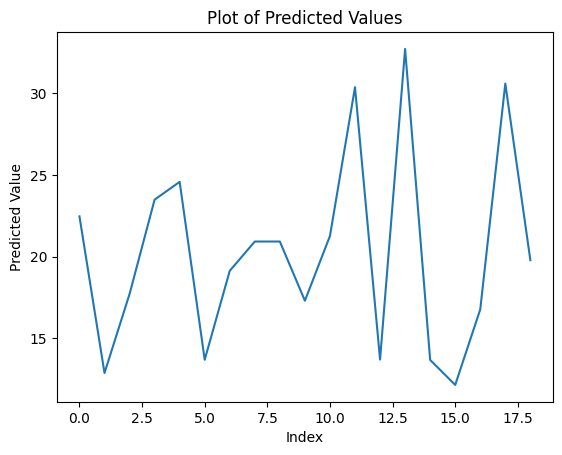

In [118]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Make predictions on the testing set
predictions = model.predict(X_test)


# Plot the predicted values
plt.plot(predictions)
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Plot of Predicted Values')
plt.show()

In [119]:
import pickle
pickle.dump(model,open("model_saved","wb"))


In [120]:
model_loaded=pickle.load(open('model_saved','rb'))
                        
            

In [121]:
model_loaded.predict(X_test)

array([22.47, 12.89, 17.72, 23.49, 24.58, 13.7 , 19.14, 20.93, 20.93,
       17.31, 21.27, 30.37, 13.71, 32.71, 13.69, 12.16, 16.78, 30.59,
       19.79])

In [33]:
# Example prediction for a new data point
new_data = pd.DataFrame({"Year":[2024],"Month":[5],'Fever':[False],'Malaria':[True],'Pain':[False], 'Dry':[False],'Wet':[True],'Artemisinin':[True], "Aspirin":[False],"Ibuprofen":[False],'Paracetamol':[False]})
if new_data["Month"].iloc[0] > 12:
    print("Invalid month: Month cannot be greater than 12.")
elif new_data["Month"].iloc[0] < 1:
    print("Invalid month: Month cannot be less than 1.")
else:
    new_prediction =model.predict(new_data)
    print("Predicted Quantity for New Data Point:", new_prediction)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Allergy
- Asthma
- Cetirizine
- Chloroquine
- Dengue Fever
- ...


In [52]:
# Import the necessary libraries
import pandas as pd

# Create a dataframe with the new data points for the year 2024
new_data = pd.DataFrame({"Year":[2024]*12,"Month":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],'Fever':[False]*12,'Malaria':[True]*12,'Pain':[False]*12, 'Dry':[False]*12,'Wet':[True]*12,'Artemisinin':[True]*12, "Aspirin":[False]*12,"Ibuprofen":[False]*12,'Paracetamol':[False]*12})

# Make predictions on the new data points
new_predictions = model.predict(new_data)

# Create a dataframe with the predicted values and the original columns
df_new = pd.DataFrame({"Year": new_data["Year"], "Month": new_data["Month"], "Malaria": new_data["Malaria"], "Wet": new_data["Wet"], "Predicted Quantity": new_predictions})

# Save the dataframe as a CSV file
df_new.to_csv('predicted_values.csv', index=False)

In [54]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
print(X.shape, X_train.shape, X_test.shape)



param_grid = {
    "n_estimators": [100, 200, 500],
    "max_depth": [3, 5, 8],
    "min_samples_split": [2, 5, 10],
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, scoring="neg_mean_squared_error")
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# Evaluate performance on test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

(37, 11) (29, 11) (8, 11)
Mean Squared Error: 23.595827951524583


In [ ]:
prediction=pd.DataFrame(predictions,columns=['predictions']).to_csv('prediction.csv')

In [ ]:
import pickle

In [57]:
xgb_model = XGBRegressor()

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
# Import the necessary libraries
import pandas as pd
from sklearn import metrics

# Make predictions on the training set
train_predictions = xgb_model.predict(X_train)

# Calculate the R-squared score for the training set
score_1 = metrics.r2_score(y_train, train_predictions)

# Calculate the mean absolute error for the training set
score_2 = metrics.mean_absolute_error(y_train, train_predictions)

print("R-squared Score:", score_1)
print("Mean Absolute Error:", score_2)

R-squared Score: 0.9999999491705204
Mean Absolute Error: 0.001043451243433459


In [59]:
# Calculate the R-squared score for the testing set
test_predictions = xgb_model.predict(X_test)
test_score_1 = metrics.r2_score(y_test, test_predictions)

# Calculate the mean absolute error for the testing set
test_score_2 = metrics.mean_absolute_error(y_test, test_predictions)


print("Testing Set R-squared Score:", test_score_1)
print("Testing Set Mean Absolute Error:", test_score_2)

Testing Set R-squared Score: 0.7614971074395551
Testing Set Mean Absolute Error: 2.9356164932250977


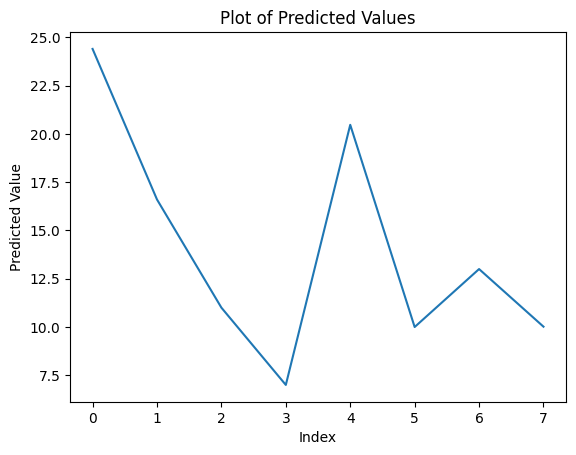

In [60]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Make predictions on the testing set
predictions = xgb_model.predict(X_test)

# Plot the predicted values
plt.plot(predictions)
plt.xlabel('Index')
plt.ylabel('Predicted Value')
plt.title('Plot of Predicted Values')
plt.show()

In [ ]:
# New data prediction
new_data = pd.DataFrame({"Year":[2024],"Month":[5],'Fever':[False],'Malaria':[True],'Pain':[False], 'Dry Season':[False],'Wet Season':[True]})
if new_data["Month"].iloc[0] > 12:
    print("Invalid month: Month cannot be greater than 12.")
elif new_data["Month"].iloc[0] < 1:
    print("Invalid month: Month cannot be less than 1.")
else:
    new_prediction = best_model.predict(new_data)
    print("Predicted Quantity for New Data Point:", new_prediction)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Back Pain
- Common Cold
- Falciparum
- Headache
- Influenza
- ...
